<a href="https://datamics.com/de/courses/"><img src=../../DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# Decision Trees und Random Forests mit Python

Dieses Notebook zeigt den Code zur Video-Lektion über Entscheidugnsbäume mit Python. Für die ausführlichen Erklärungen zum Code schaut bitte ins Video. 

## Libraries importieren

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten laden

In [18]:
df = pd.read_csv('kyphosis.csv')

In [19]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Explorative Daten Analyse

Wir schauen uns ein einfaches Pairplot für diesen kleinen Datensatz an.

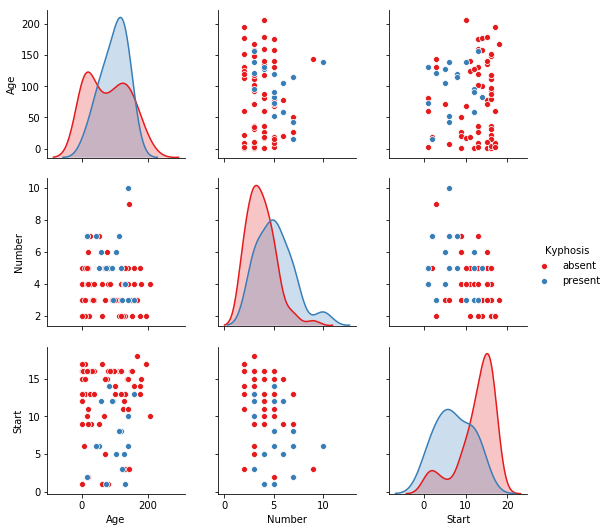

In [20]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

# Train Test Split

Fahren wir damit fort unsere Daten in Trainings- und Testset aufzuteilen:

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees (Entscheidungsbäume)

Wir beginnen damit einen einzelnen Entscheidungsbaum zu trainieren:

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Vorhersage und Auswertung

Lasst uns den Entscheidungsbaum auswerten.

In [27]:
predictions = dtree.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.95      0.86      0.90        21
     present       0.50      0.75      0.60         4

   micro avg       0.84      0.84      0.84        25
   macro avg       0.72      0.80      0.75        25
weighted avg       0.88      0.84      0.85        25



In [30]:
print(confusion_matrix(y_test,predictions))

[[18  3]
 [ 1  3]]


## Entscheidungsbaum Visualisierung

SciKit Learn verfügt über die eingebaute Fähigkeit Entscheidungsbäume zu visualisieren. 

Dies wirst du vermutlich nicht oft benötigen und es erfordert die Installation von `pydot` und `graphviz`:

    conda install graphviz
    
    pip install pydot
    
*Hinweis: Beachtet bitte die Reihenfolge. Je nach eueren Python- und Library-Versionen benötigt graphviz die Anpassung einiger Versionen. Diese müssen wir zur Nutzung von Decision Tree Visualisierungen zustimmen.*

Nichtsdestotrotz schauen wir uns der Vollständigkeit halber ein Beispiel davon an!

In [31]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

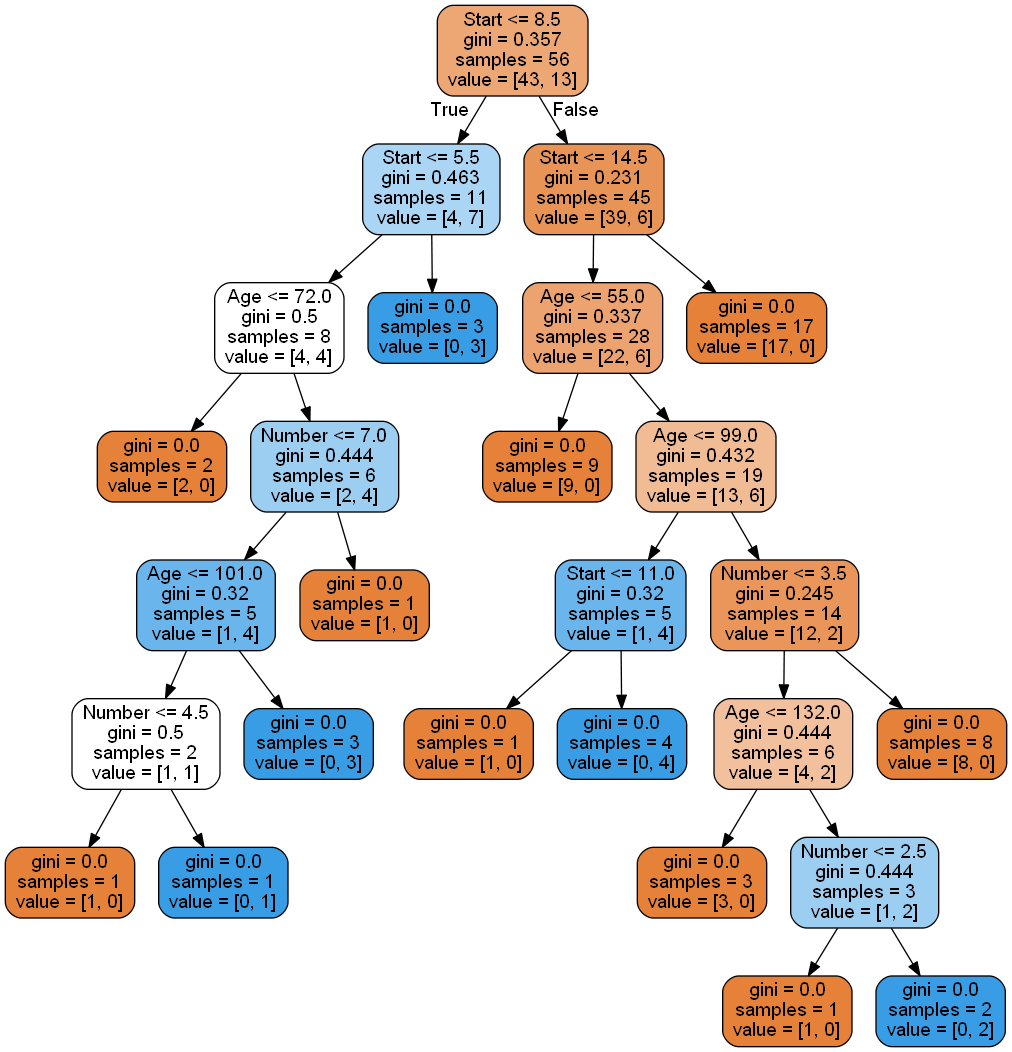

In [32]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Jetzt können wir unseren Entscheidungsbaum mit einen Random Forest vergleichen:

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
rfc_pred = rfc.predict(X_test)

In [35]:
print(confusion_matrix(y_test,rfc_pred))

[[20  1]
 [ 2  2]]


In [36]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      0.95      0.93        21
     present       0.67      0.50      0.57         4

   micro avg       0.88      0.88      0.88        25
   macro avg       0.79      0.73      0.75        25
weighted avg       0.87      0.88      0.87        25



# Gut gemacht!